In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#pd.read_hdf("/content/drive/My Drive/ANN project2/SVHN_single_grey1.h5")
import h5py

f = h5py.File("/content/drive/My Drive/ANN project2/SVHN_single_grey1.h5")

In [47]:
for i in f.keys():
  print(i)
    

X_test
X_train
X_val
y_test
y_train
y_val


In [0]:
X_test=f["X_test"].value

In [0]:
X_train=f["X_train"].value
X_val=f["X_val"].value
y_test=f["y_test"].value
y_train=f["y_train"].value
y_val=f["y_val"].value

In [50]:
X_train.shape

(42000, 32, 32)

In [51]:
X_test.shape

(18000, 32, 32)

In [52]:
X_val.shape

(60000, 32, 32)

In [53]:
y_val.shape

(60000,)

In [54]:
y_train.shape

(42000,)

<function matplotlib.pyplot.show>

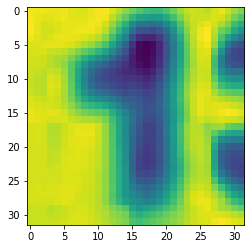

In [55]:
plt.imshow(X_val[5002])
plt.show

In [56]:
y_val[5002]

1

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
X_train2=np.reshape(X_train, (42000,1024))
X_test2=np.reshape(X_test, (18000,1024))
knn.fit(X_train2, y_train )
pred=knn.predict(X_test2)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.5168333333333334

In [0]:
!pip3 install -U tensorflow==2.0 --quiet

In [0]:
import tensorflow as tf

In [0]:
y_train1= tf.keras.utils.to_categorical(y_train)
y_test1= tf.keras.utils.to_categorical(y_test)

In [0]:
y_val1= tf.keras.utils.to_categorical(y_val)

In [0]:
m3=tf.keras.models.Sequential()
m3.add(tf.keras.layers.Reshape((1024,), input_shape=(32,32,)))
m3.add(tf.keras.layers.BatchNormalization())

m3.add(tf.keras.layers.Dense(256, activation='relu'))
m3.add(tf.keras.layers.BatchNormalization())
m3.add(tf.keras.layers.Dense(128, activation='relu'))
m3.add(tf.keras.layers.BatchNormalization())
m3.add(tf.keras.layers.Dense(128, activation='relu'))
m3.add(tf.keras.layers.Dense(128, activation='relu'))
m3.add(tf.keras.layers.Dense(128, activation='relu'))
m3.add(tf.keras.layers.BatchNormalization())
m3.add(tf.keras.layers.Dense(128, activation='relu'))
m3.add(tf.keras.layers.Dense(128, activation='relu'))
m3.add(tf.keras.layers.BatchNormalization())
m3.add(tf.keras.layers.Dense(128, activation='relu'))
m3.add(tf.keras.layers.Dense(128, activation='relu'))
m3.add(tf.keras.layers.Dense(128, activation='relu'))
m3.add(tf.keras.layers.BatchNormalization())
m3.add(tf.keras.layers.Dense(128, activation='relu'))
m3.add(tf.keras.layers.Dense(128, activation='relu'))
m3.add(tf.keras.layers.BatchNormalization())
m3.add(tf.keras.layers.Dense(128, activation='relu'))
m3.add(tf.keras.layers.Dense(256, activation='relu'))
m3.add(tf.keras.layers.BatchNormalization())



m3.add(tf.keras.layers.Dense(10, activation='softmax'))
m3.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

In [93]:

history3 = m3.fit(X_train, y_train1, validation_data=(X_test, y_test1), epochs=5, batch_size=16)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 29s 683us/sample - loss: 0.4380 - accuracy: 0.8627 - val_loss: 0.4337 - val_accuracy: 0.8733
Epoch 2/5
42000/42000 [==============================] - 28s 678us/sample - loss: 0.4393 - accuracy: 0.8639 - val_loss: 0.4302 - val_accuracy: 0.8735
Epoch 3/5
42000/42000 [==============================] - 28s 676us/sample - loss: 0.4316 - accuracy: 0.8641 - val_loss: 0.4422 - val_accuracy: 0.8702
Epoch 4/5
42000/42000 [==============================] - 29s 679us/sample - loss: 0.4365 - accuracy: 0.8629 - val_loss: 0.4394 - val_accuracy: 0.8722
Epoch 5/5
42000/42000 [==============================] - 28s 677us/sample - loss: 0.4347 - accuracy: 0.8630 - val_loss: 0.4771 - val_accuracy: 0.8719


In [94]:
m3.evaluate(X_train, y_train1)

42000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2233948471148809, 0.9394524]

In [95]:
m3.evaluate(X_test , y_test1)

18000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.47709983609782325, 0.8719444]

In [96]:
m3.evaluate(X_val, y_val1)

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.29950634408295157, 0.9192]

In [0]:
m3.save('Best_StreetView2.h5')

In [0]:
from google.colab import files

files.download('Best_StreetView2.h5')

In [0]:
# I have tried more than 20 models with different hyper-tuning of parameters.
#some where i have used more neurons and less layers , which showed loss training loss and high val loss, i.e. model was overfitting.
#In some of my models i have used dropouts , but it was decreasing accuracy , with high loss.
# Various activations i have used and came to a conclusion , relu and leaky relu were nearly same.
# In optimizers i have used sgd, adam , adamax and finally nadam -- among all of the nadam was the fastest.
# In the end ,  I can used 500 nuerons or more with 2 or 3 layers of dense ,
  # but time of execution was long, i used multiple layers to reduce time complexity, i.e. with 20 epocs i got 
  # the solution ,rather than training it with 100-200 epocs which is nothing but memorizing not learning.

#Batch normalization after 2 or 3 layers was performing the same as using it after several layers, thus reducing time complexity.
# Classical Ml was giving an accuracy og 51 and with Neural networks we got an accuracy of 92% approx.